## Notebook 3: Data Visualization (`3_Data_Visualization.ipynb`)

**Purpose:** To create visual representations of the data trends using libraries like Matplotlib, Seaborn, and Plotly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For 3D plots

df = pd.read_csv('/Users/apple/Documents/Uni/Personal /Netlfix_Project/Data/netflix_cleaned.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November
8789,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July
8790,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November
8791,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January


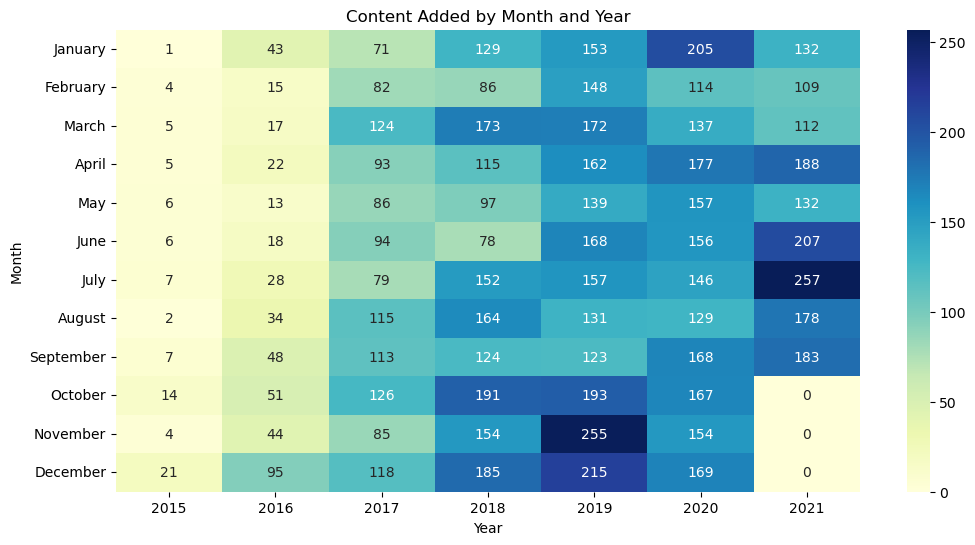

In [2]:
# Prepare data for heatmap
# We filter for recent years to keep the chart readable
df_recent = df[df['year_added'] >= 2015]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

heatmap_data = df_recent.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)
heatmap_data = heatmap_data[month_order] # Reorder columns

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Content Added by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


*   **Heatmap:** We create a heatmap comparing `Month Added` vs. `Year Added`. Darker colors indicate months where Netflix added the most content, helping to identify seasonal release patterns

In [5]:
# Filter for Movies only
movies = df[df['type'] == 'Movie'].copy()

# Drop rows with missing duration to avoid errors
movies.dropna(subset=['duration'], inplace=True)

# Clean duration to get integer minutes
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

# Create 3D Plot
fig = px.scatter_3d(movies, 
                    x='release_year', 
                    y='duration_min', 
                    z='year_added',
                    color='rating',
                    hover_name='title',
                    title='3D View: Release Year vs Duration vs Added Year',
                    opacity=0.7)
fig.show()

*   **3D Scatter Plot:**
    *   **Data Prep:** We filter for Movies only and clean the `duration` column (removing " min" and converting to numbers). **Crucially**, we drop rows with missing duration values to prevent errors.
    *   **The Plot:** We use Plotly to create an interactive 3D chart plotting **Release Year** (x), **Duration** (y), and **Year Added** (z). This visualizes complex relationships, such as whether older movies added to Netflix tend to be shorter or longer than modern ones.

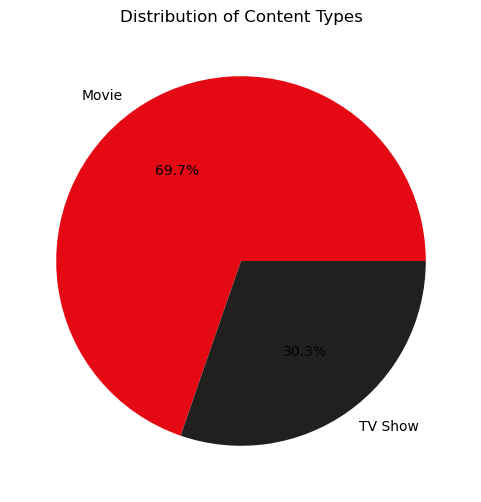

In [6]:
# Content Type Distribution
plt.figure(figsize=(6, 6))
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', colors=['#E50914', '#221f1f'])
plt.title('Distribution of Content Types')
plt.show()

*   **Distribution Charts:** A pie chart provides a quick visual reference for the ratio of Movies to TV Shows calculated in the previous notebook.